# Data

In [83]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

# Training dataset as a string variable
training_data_csv = '''Headline Length (in words),Article Length (in words),Number of Images,Publication Day,Popularity (in views),Popularity (Class)
4,250,1,Wednesday,10,Unpopular
9,700,2,Monday,15,Unpopular
11,950,3,Friday,20,Popular
14,800,2,Tuesday,25,Popular
6,300,1,Thursday,12,Unpopular
12,600,2,Wednesday,18,Unpopular
10,500,1,Monday,14,Unpopular
13,750,3,Friday,22,Popular
15,900,2,Tuesday,28,Popular
7,350,1,Thursday,13,Unpopular
8,450,2,Sunday,16,Unpopular
16,1100,4,Tuesday,32,Popular
10,550,1,Friday,15,Unpopular
12,850,2,Thursday,24,Popular
'''

# Test dataset as a string variable
test_data_csv = '''Headline Length (in words),Article Length (in words),Number of Images,Publication Day,Popularity (in views),Popularity (Class)
5,400,1,Sunday,11,Unpopular
10,900,3,Wednesday,19,Popular
13,700,2,Monday,21,Unpopular
11,500,1,Friday,17,Popular
'''

# Load training data into a pandas dataframe
training_df = pd.read_csv(StringIO(training_data_csv))

# Load test data into a pandas dataframe
test_df = pd.read_csv(StringIO(test_data_csv))


In [85]:
training_df[["Headline Length (in words)","Popularity (in views)"]]

,Headline Length (in words),Popularity (in views)
0,4,10
1,9,15
2,11,20
3,14,25
4,6,12
5,12,18
6,10,14
7,13,22
8,15,28
9,7,13


# Plots

### Scatter plot

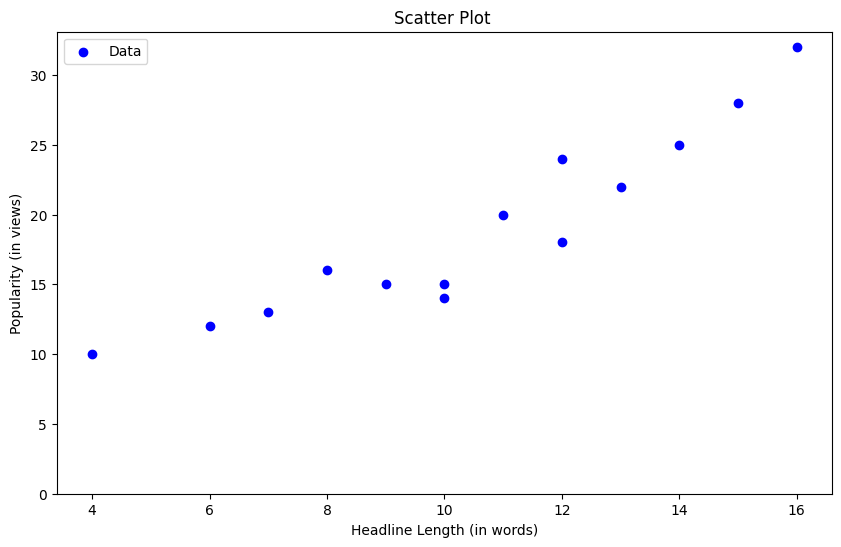

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Create the design matrix
X = np.vstack((np.ones_like(x), x)).T

# Calculate optimal b0 and b1 using the normal equation
optimal_params = np.linalg.inv(X.T @ X) @ X.T @ y
b0_optimal, b1_optimal = optimal_params[0], optimal_params[1]

# Scatter plot with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.xlabel('Headline Length (in words)')
plt.ylabel('Popularity (in views)')
plt.title('Scatter Plot ')
plt.legend()
plt.ylim(0, None)
plt.show()


### Random line plot

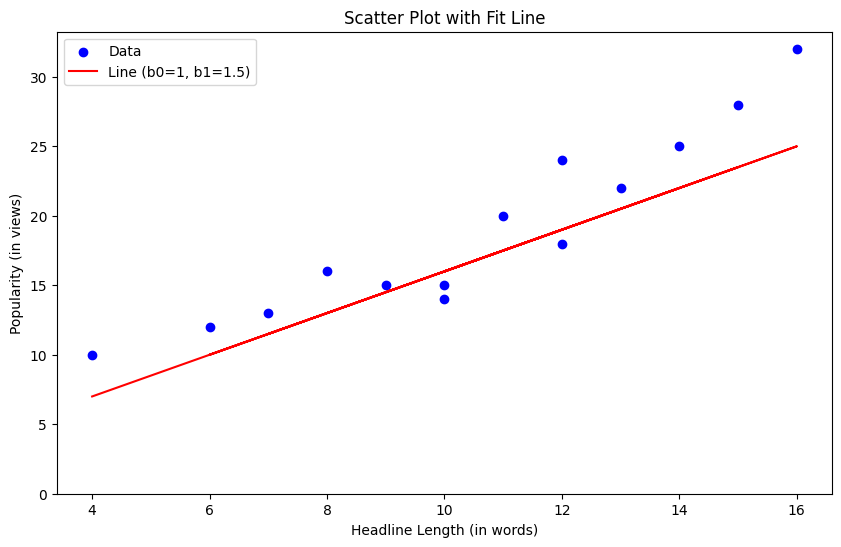

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

b0 = 1
b1 = 1.5

# Scatter plot with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, b0 + b1 * x, color='red', label=f'Line (b0={b0}, b1={b1})')
plt.xlabel('Headline Length (in words)')
plt.ylabel('Popularity (in views)')
plt.title('Scatter Plot with Fit Line')
plt.legend()
plt.ylim(0, None)
plt.show()


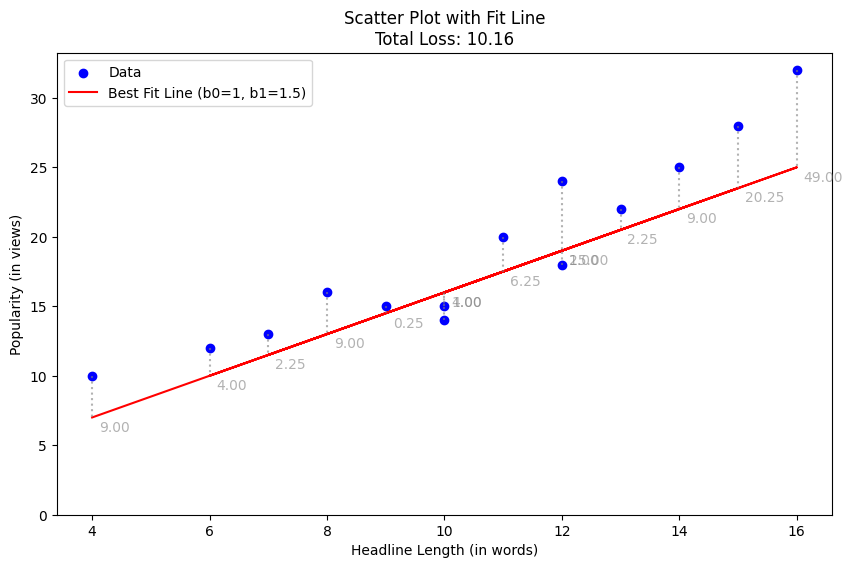

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

b0 = 1
b1 = 1.5

# Scatter plot with best-fit line and point contributions
loss = np.mean((b0 + b1 * x - y) ** 2)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, b0 + b1 * x, color='red', label=f'Best Fit Line (b0={b0}, b1={b1})')

for i in range(len(x)):
    xi = x[i]
    yi = y[i]
    contribution = (b0 + b1 * xi - yi) ** 2
    plt.plot([xi, xi], [yi, b0 + b1 * xi], color='gray', linestyle=':', alpha=0.6)
    plt.annotate(f'{contribution:.2f}', (xi, b0 + b1 * xi), xytext=(5, -10), textcoords='offset points', color='gray', alpha=0.6)

plt.xlabel('Headline Length (in words)')
plt.ylabel('Popularity (in views)')
plt.title(f'Scatter Plot with Fit Line\nTotal Loss: {loss:.2f}')
plt.legend()
plt.ylim(0, None)
plt.show()


### Best fit plot

In [78]:
b0_optimal,b1_optimal

(0.4571428571428853, 1.75238095238095)

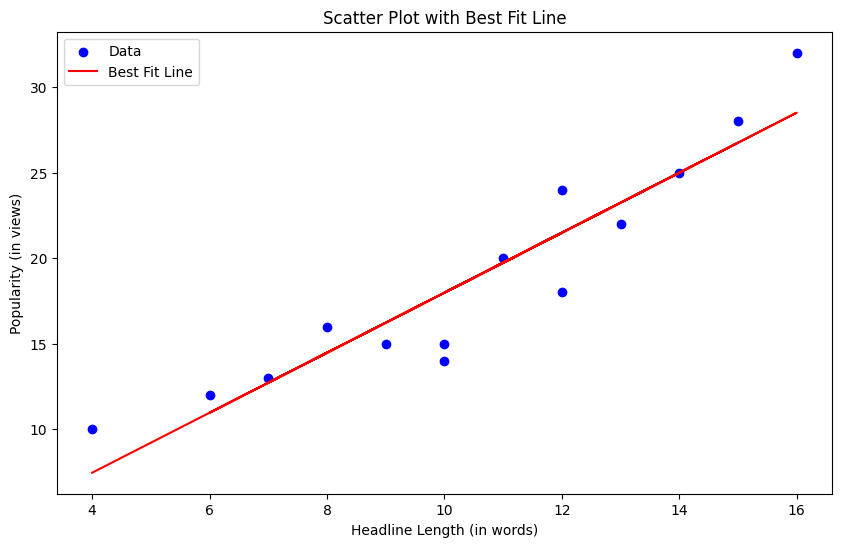

(0.4571428571428853, 1.75238095238095)

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Create the design matrix
X = np.vstack((np.ones_like(x), x)).T

# Calculate optimal b0 and b1 using the normal equation
optimal_params = np.linalg.inv(X.T @ X) @ X.T @ y
b0_optimal, b1_optimal = optimal_params[0], optimal_params[1]

# Scatter plot with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, b0_optimal + b1_optimal * x, color='red', label='Best Fit Line')
plt.xlabel('Headline Length (in words)')
plt.ylabel('Popularity (in views)')
plt.title('Scatter Plot with Best Fit Line')
plt.legend()
plt.show()
b0_optimal, b1_optimal

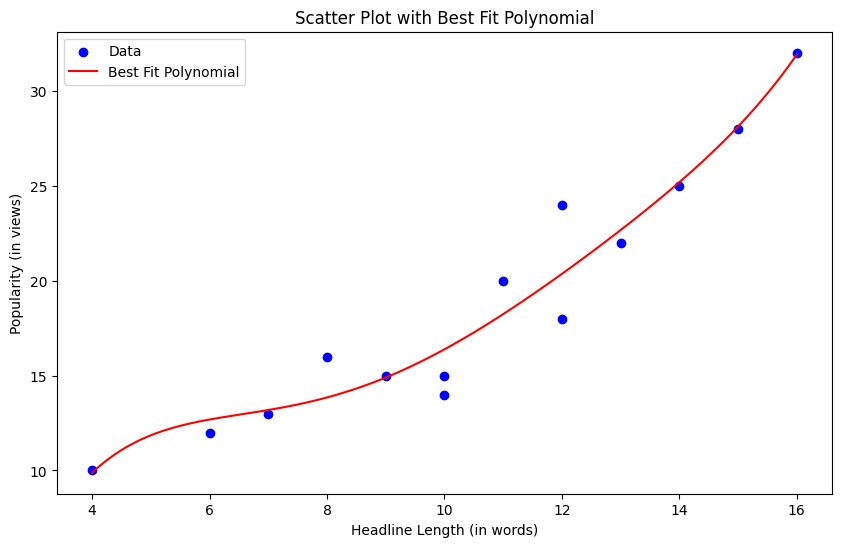

Optimal parameters: [-4.10556228e+01  2.93232789e+01 -6.26416465e+00  6.45430377e-01
 -3.14238245e-02  5.94247240e-04 -1.54220096e-10 -6.97089742e-12
 -2.68857120e-13 -7.97441496e-15 -1.38825325e-16]


In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Define the degree of the polynomial
degree = 10

# Create the design matrix with polynomial features
X = np.vander(x, degree + 1, increasing=True)

# Calculate optimal parameters using the least squares method
optimal_params = np.linalg.inv(X.T @ X) @ X.T @ y

# Scatter plot with best-fit polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')

# Generate points on the x-axis for plotting the curve
x_curve = np.linspace(min(x), max(x), 100)

# Compute the predicted values using the optimal parameters
y_curve = np.polyval(optimal_params[::-1], x_curve)

# Plot the polynomial curve
plt.plot(x_curve, y_curve, color='red', label='Best Fit Polynomial')

plt.xlabel('Headline Length (in words)')
plt.ylabel('Popularity (in views)')
plt.title('Scatter Plot with Best Fit Polynomial')
plt.legend()
plt.show()

print("Optimal parameters:", optimal_params)

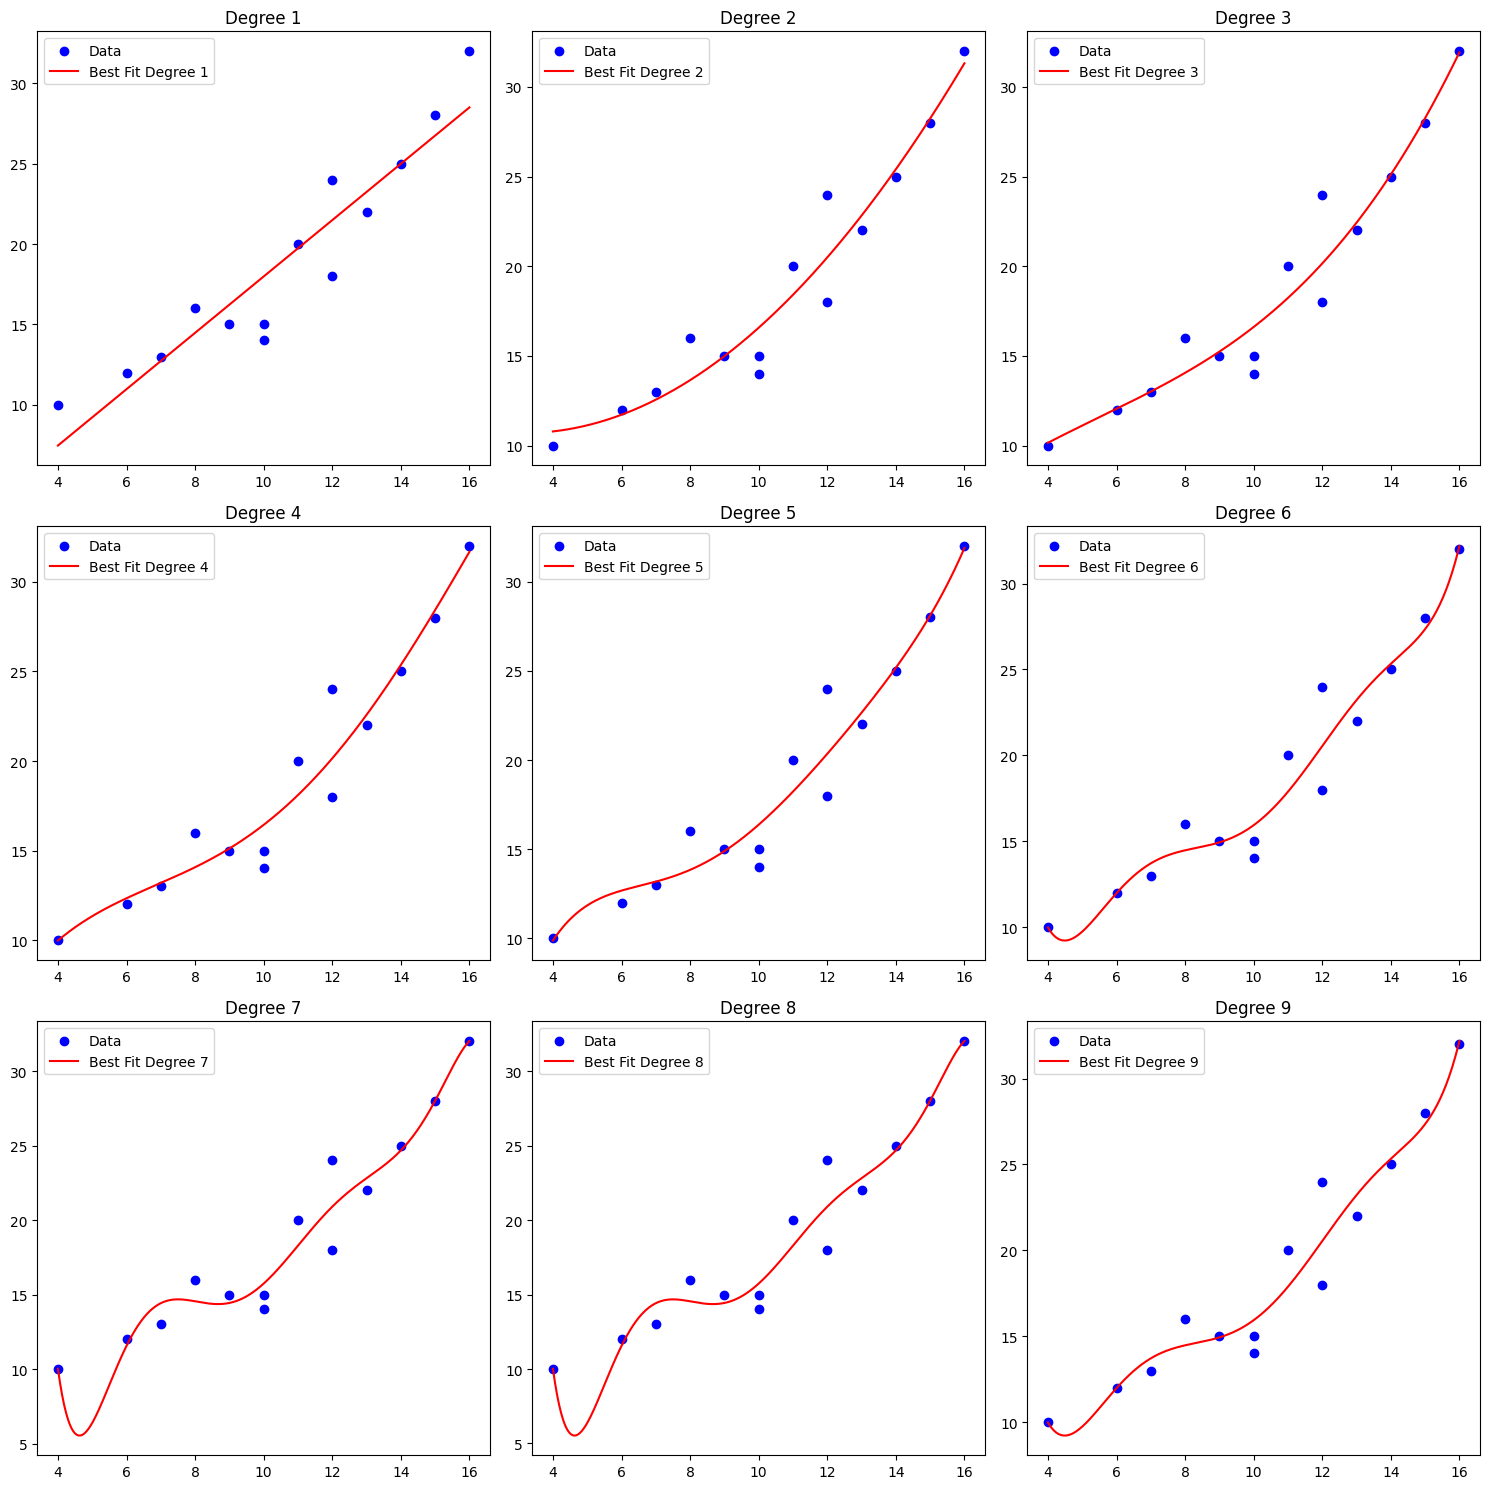

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Define maximum degree for polynomial
max_degree = 3

# Create grid of subplots
fig, axs = plt.subplots(max_degree, max_degree, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Generate a range of x-values to use for plotting
x_values = np.linspace(min(x), max(x), 400)

for i in range(max_degree):
    for j in range(max_degree):
        degree = i * max_degree + j + 1
        
        # Create the design matrix for a polynomial model of a certain degree
        X = np.vstack([x**k for k in range(degree+1)]).T

        # Calculate optimal parameters using the normal equation
        optimal_params = np.linalg.inv(X.T @ X) @ X.T @ y

        # Plot the data and the best-fit polynomial
        axs[i, j].scatter(x, y, color='blue', label='Data')
        axs[i, j].plot(x_values, sum([optimal_params[k] * x_values**k for k in range(degree+1)]), color='red', label=f'Best Fit Degree {degree}')
        axs[i, j].set_title(f'Degree {degree}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [224]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Loss function
def calculate_loss(b0, b1):
    predictions = b0 + b1 * x
    mse = np.mean((predictions - y) ** 2)
    return mse

# Define parameter range
b0_range = np.linspace(-1, 1, 100)
b1_range = np.linspace(-3, 6, 100)

# Calculate loss for each combination of b0 and b1
losses = np.empty((len(b0_range), len(b1_range)))
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        losses[j,i] = calculate_loss(b0, b1)

# Create meshgrid for 3D plot
B0, B1 = np.meshgrid(b0_range, b1_range)

# Create surface plot
def plot_surface(ax, b0, b1,x_theta,y_theta):
    ax.plot_surface(B0, B1, losses, cmap='viridis', rstride=1, cstride=1, alpha=0.4, linewidth=0, antialiased=False)
    ax.scatter(b0, b1, calculate_loss(b0, b1), color='red', s=100, label='Selected Point', alpha=1, edgecolor='black', zorder=1)
    ax.set_xlabel('b0')
    ax.set_ylabel('b1')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Function Surface')
    ax.view_init(x_theta,y_theta)
    ax.legend()

# Update and draw plots
def update_plot(b0, b1,x_theta,y_theta):
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Create scatter plot and regression line
    ax1.scatter(x, y, color='blue', label='Data')
    line, = ax1.plot(x, b0 + b1 * x, color='red', label='Regression Line')
    ax1.set_xlabel('Headline Length (in words)')
    ax1.set_ylabel('Popularity (in views)')
    ax1.set_title('Scatter Plot with Regression Line')
    ax1.legend()

    # Create surface plot
    ax2 = fig.add_subplot(122, projection='3d')
    plot_surface(ax2, b0, b1,x_theta,y_theta)

    # Draw the plots
    plt.show()

# Display sliders and initial plots
interact(
    update_plot,
    b0=(b0_range.min(),b0_range.max()),
    b1=(b1_range.min(),b1_range.max()),
    x_theta=(-10,10),
    y_theta=(-30,30)
)

interactive(children=(FloatSlider(value=0.0, description='b0', max=1.0, min=-1.0), FloatSlider(value=1.5, desc…

<function __main__.update_plot(b0, b1, x_theta, y_theta)>

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (in views)']

# Loss function
def calculate_loss(b0, b1):
    predictions = b0 + b1 * x
    mse = np.mean((predictions - y) ** 2)
    return mse

# Define parameter range
b0_range = np.linspace(-1, 1, 100)
b1_range = np.linspace(-3, 6, 100)

# Calculate loss for each combination of b0 and b1
losses = np.empty((len(b0_range), len(b1_range)))
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        losses[j,i] = calculate_loss(b0, b1)

# Create meshgrid for contour plot
B0, B1 = np.meshgrid(b0_range, b1_range)

# Create contour plot
def plot_contour(ax,fig, b0, b1):
    cont = ax.contourf(B0, B1, losses, cmap='viridis')
    loss = calculate_loss(b0, b1)
    ax.scatter(b0, b1, color='red', s=100, label=f'Selected Point {loss}')
    fig.colorbar(cont, ax=ax, label='Loss')
    ax.set_xlabel('b0')
    ax.set_ylabel('b1')
    ax.set_title('Loss Function Contour')
    ax.legend()

# Update and draw plots
def update_plot(b0, b1):
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Create scatter plot and regression line
    ax1.scatter(x, y, color='blue', label='Data')
    ax1.plot(x, b0 + b1 * x, color='red', label=f'Line (b0={b0}, b1={b1})')
    ax1.set_xlabel('Headline Length (in words)')
    ax1.set_ylabel('Popularity (in views)')
    ax1.set_title('Scatter Plot with Regression Line')
    ax1.legend()

    # Create contour plot
    plot_contour(ax2,fig, b0, b1)

    # Draw the plots
    plt.show()

# Display sliders and initial plots
interact(
    update_plot,
    b0=(b0_range.min(),b0_range.max()),
    b1=(b1_range.min(),b1_range.max())
)


interactive(children=(FloatSlider(value=0.0, description='b0', max=1.0, min=-1.0), FloatSlider(value=1.5, desc…

<function __main__.update_plot(b0, b1)>